# Association Analysis  
Frequent Item set Mining using Apriori algorithm in Python

---  
> Apriori is an algorithm for frequent item set mining and **association rule learning** over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.(*see Apriori Algorithm, Wikipedia 2019*)  


Links:  
* [Medium - Association Analysis in Python](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c)
* [Association Rule Mining Tutorial](http://www.pycaret.org/tutorials/html/ARUL101.html)
* [Association Rule Mining](https://sherbold.github.io/intro-to-data-science/exercises/Exercise_Association_Rule_Mining.html) 
* [Kaggle - Association Rule Mining](https://www.kaggle.com/code/rfelizomni/association-rule-mining/notebook)
---  
Source: 
+ [Morris Riedel](http://www.morrisriedel.de/on4off-demo-association-rule-mining-apriori-example)

History:  
- May 2022, V1 - dbe - initial version
- June 2023, V2 - dbe - minior corrections for BINA FS23



#### Sources/Links
* [Medium - Association Analysis in Python](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c)
* [Association Rule Mining Tutorial](http://www.pycaret.org/tutorials/html/ARUL101.html)
* [Association Rule Mining](https://sherbold.github.io/intro-to-data-science/exercises/Exercise_Association_Rule_Mining.html) 
* [Kaggle - Association Rule Mining](https://www.kaggle.com/code/rfelizomni/association-rule-mining/notebook)

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/sawubona-gmbh/BINA-FS23-WORK/raw/main/LB11-Associations%2BRecommenderSystem/Python/retail_dataset.csv', sep=',')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [3]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [4]:
# transform dataset to one-hot encoded dataset
encoded_items = []
def onehotencoding():
    for index, row in df.iterrows():
        present = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            present[uc] = 0
        for com in commons:
            present[com] = 1
        encoded_items.append(present)
onehotencoding()
ohe_df = pd.DataFrame(encoded_items)
print(ohe_df)

     Bagel  Milk  Eggs  Pencil  Cheese  Wine  Meat  Diaper  Bread
0        0     0     1       1       1     1     1       1      1
1        0     1     0       1       1     1     1       1      1
2        0     1     1       0       1     1     1       0      0
3        0     1     1       0       1     1     1       0      0
4        0     0     0       1       0     1     1       0      0
..     ...   ...   ...     ...     ...   ...   ...     ...    ...
310      0     0     1       0       1     0     0       0      1
311      0     1     0       1       0     0     1       0      0
312      0     0     1       1       1     1     1       1      1
313      0     0     0       0       1     0     1       0      0
314      1     0     1       0       0     1     1       0      1

[315 rows x 9 columns]


In [5]:
# running apriori algorithm
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(10)

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.361905,(Pencil)
4,0.501587,(Cheese)
5,0.438095,(Wine)
6,0.476190,(Meat)
7,0.406349,(Diaper)
8,0.504762,(Bread)
9,0.225397,"(Bagel, Milk)"


In [6]:
print(freq_items)

     support              itemsets
0   0.425397               (Bagel)
1   0.501587                (Milk)
2   0.438095                (Eggs)
3   0.361905              (Pencil)
4   0.501587              (Cheese)
5   0.438095                (Wine)
6   0.476190                (Meat)
7   0.406349              (Diaper)
8   0.504762               (Bread)
9   0.225397         (Bagel, Milk)
10  0.279365        (Bagel, Bread)
11  0.244444          (Milk, Eggs)
12  0.304762        (Milk, Cheese)
13  0.219048          (Milk, Wine)
14  0.244444          (Milk, Meat)
15  0.279365         (Milk, Bread)
16  0.298413        (Eggs, Cheese)
17  0.241270          (Eggs, Wine)
18  0.266667          (Eggs, Meat)
19  0.200000      (Pencil, Cheese)
20  0.200000        (Pencil, Wine)
21  0.200000       (Pencil, Bread)
22  0.269841        (Wine, Cheese)
23  0.323810        (Cheese, Meat)
24  0.200000      (Diaper, Cheese)
25  0.238095       (Cheese, Bread)
26  0.250794          (Wine, Meat)
27  0.234921        

In [7]:
# using frequent itemsets from apriori for association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
5,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
7,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
8,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
9,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


In [11]:
support = rules['support']
confidence = rules['confidence']
print (support, confidence)

0     0.279365
1     0.304762
2     0.304762
3     0.298413
4     0.266667
5     0.269841
6     0.323810
7     0.323810
8     0.203175
9     0.203175
10    0.203175
11    0.215873
12    0.215873
13    0.215873
Name: support, dtype: float64 0     0.656716
1     0.607595
2     0.607595
3     0.681159
4     0.608696
5     0.615942
6     0.645570
7     0.680000
8     0.666667
9     0.831169
10    0.627451
11    0.723404
12    0.809524
13    0.666667
Name: confidence, dtype: float64


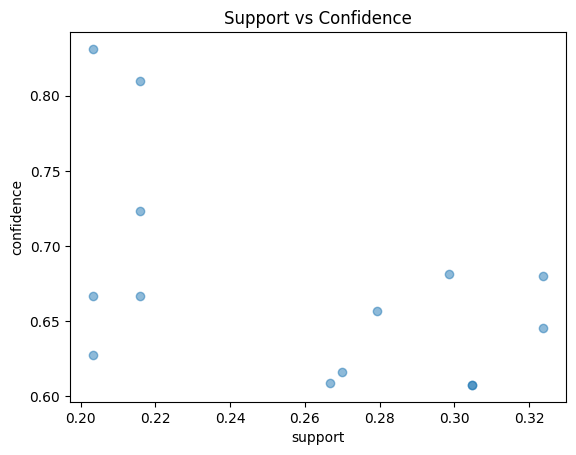

In [10]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()